# Checking 

From wikipedia and from Kayenta
$$\frac{\partial J_{3} }{\partial \sigma} = s^{2} - \frac{2}{3} J_{2} 1$$

I want to see if the values come out the same if I calcualte the derivatives of the determinant 

In [1]:
import sympy as sp

In [2]:
# Varaibles that will be operated on
# p: Mean stress
# t_ij: Components of the stress tensor
t11, t22, t33, t12, t13, t23, p= sp.symbols('t11 t22 t33 t12 t13 t23 p') 

s, J2, I = sp.symbols('s, J2, I')

I = sp.Matrix([[1, 0, 0],
               [0, 1, 0],
               [0, 0, 1]]
              )

p = 1/3* (t11 + t22 + t33)

# J3: Stress invariant (det (s) )
J3=  (t11 - p) * (t22 - p) * (t33 - p) - (t11 - p) * t23**2 - (t22 - p) * t13**2 - (t33 - p) * t12**2 + 2 * t12 * t13 * t23

stress_list = [t11, t22, t33, t12, t13, t23]

In [60]:
print(sp.latex(sp.nsimplify(J3)))

- t_{12}^{2} \left(- \frac{t_{11}}{3} - \frac{t_{22}}{3} + \frac{2 t_{33}}{3}\right) + 2 t_{12} t_{13} t_{23} - t_{13}^{2} \left(- \frac{t_{11}}{3} + \frac{2 t_{22}}{3} - \frac{t_{33}}{3}\right) - t_{23}^{2} \left(\frac{2 t_{11}}{3} - \frac{t_{22}}{3} - \frac{t_{33}}{3}\right) + \left(- \frac{t_{11}}{3} - \frac{t_{22}}{3} + \frac{2 t_{33}}{3}\right) \left(- \frac{t_{11}}{3} + \frac{2 t_{22}}{3} - \frac{t_{33}}{3}\right) \left(\frac{2 t_{11}}{3} - \frac{t_{22}}{3} - \frac{t_{33}}{3}\right)


$$- t_{12}^{2} \left(- \frac{t_{11}}{3} - \frac{t_{22}}{3} + \frac{2 t_{33}}{3}\right) + 2 t_{12} t_{13} t_{23} - t_{13}^{2} \left(- \frac{t_{11}}{3} + \frac{2 t_{22}}{3} - \frac{t_{33}}{3}\right) - t_{23}^{2} \left(\frac{2 t_{11}}{3} - \frac{t_{22}}{3} - \frac{t_{33}}{3}\right) + \left(- \frac{t_{11}}{3} - \frac{t_{22}}{3} + \frac{2 t_{33}}{3}\right) \left(- \frac{t_{11}}{3} + \frac{2 t_{22}}{3} - \frac{t_{33}}{3}\right) \left(\frac{2 t_{11}}{3} - \frac{t_{22}}{3} - \frac{t_{33}}{3}\right)$$

In [30]:
Latex = True

# Loop over the stress terms and calculate the derivatives
for stress in stress_list:
    # Calc the derivative
    deriv = J3.diff(stress, evaluate = True)
    deriv_simp = sp.nsimplify(deriv)
    
    # Print the result with a label and a newline
    print(f"Derivative wrt. {stress}")

    # Expand the terms and combine like terms
    deriv_simp = sp.expand(deriv_simp)

    # Switch for if the output should be in latex format
    if Latex:
        deriv_simp = sp.latex(deriv_simp)
        deriv_simp
        print(deriv_simp)
    else:
        sp.pprint(deriv_simp)
    print("-----------------------------------------------------")

Derivative wrt. t11
\frac{2 t_{11}^{2}}{9} - \frac{2 t_{11} t_{22}}{9} - \frac{2 t_{11} t_{33}}{9} + \frac{t_{12}^{2}}{3} + \frac{t_{13}^{2}}{3} - \frac{t_{22}^{2}}{9} + \frac{4 t_{22} t_{33}}{9} - \frac{2 t_{23}^{2}}{3} - \frac{t_{33}^{2}}{9}
-----------------------------------------------------
Derivative wrt. t22
- \frac{t_{11}^{2}}{9} - \frac{2 t_{11} t_{22}}{9} + \frac{4 t_{11} t_{33}}{9} + \frac{t_{12}^{2}}{3} - \frac{2 t_{13}^{2}}{3} + \frac{2 t_{22}^{2}}{9} - \frac{2 t_{22} t_{33}}{9} + \frac{t_{23}^{2}}{3} - \frac{t_{33}^{2}}{9}
-----------------------------------------------------
Derivative wrt. t33
- \frac{t_{11}^{2}}{9} + \frac{4 t_{11} t_{22}}{9} - \frac{2 t_{11} t_{33}}{9} - \frac{2 t_{12}^{2}}{3} + \frac{t_{13}^{2}}{3} - \frac{t_{22}^{2}}{9} - \frac{2 t_{22} t_{33}}{9} + \frac{t_{23}^{2}}{3} + \frac{2 t_{33}^{2}}{9}
-----------------------------------------------------
Derivative wrt. t12
\frac{2 t_{11} t_{12}}{3} + \frac{2 t_{12} t_{22}}{3} - \frac{4 t_{12} t_{33}}{3} 

In [69]:
s = sp.Matrix([[t11 - p, t12, t13],
               [t12, t22 - p, t23],
               [t13, t23, t33-p]]
            )

# J2 Stress invariant
J2 = 1/2 * ((t11-p)**2 + (t22-p)**2 + (t33-p)**2 + 2*(t12**2 + t13**2 + t23**2))

imech_ans = s *s - 2/3 * J2 * I

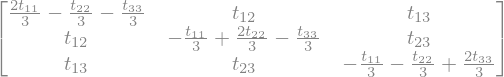

In [70]:
sp.nsimplify(s)

In [71]:
imech_ans_simp =sp.nsimplify(imech_ans)
imech_ans_simp = sp.expand(imech_ans_simp)

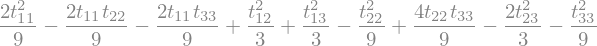

In [72]:
imech_ans_simp[0,0]

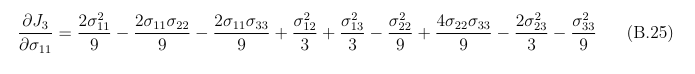

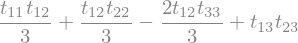

In [78]:
imech_ans_simp[0,1]

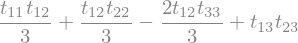

In [79]:
imech_ans_simp[1, 0]

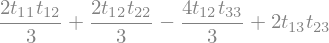

In [80]:
imech_ans_simp[0,1] + imech_ans_simp[1, 0]